In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

companies = ['WMT', 'FB']
df = pd.read_csv('Walmart_FB_2014_2017.csv', index_col='Date')

In [2]:
df.head()

,WMT,FB
Date,,
2013-12-31,71.126411,54.650002
2014-01-02,71.325287,54.709999
2014-01-03,71.090279,54.560001
2014-01-06,70.692558,57.200001
2014-01-07,70.909485,57.919998


In [3]:
type(df.index)

pandas.core.indexes.base.Index

In [4]:
df.index=pd.to_datetime(df.index)

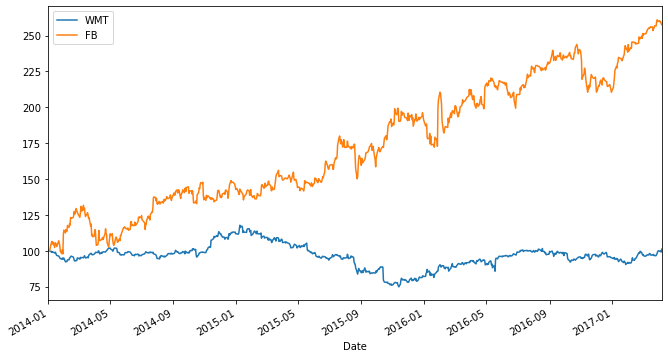

In [5]:
(df / df.iloc[0] * 100).plot(figsize=(11, 6))

In [6]:
log_returns = np.log(df/ df.shift(1))

In [7]:
log_returns.head()

,WMT,FB
Date,,
2013-12-31,NaN,NaN
2014-01-02,0.002792,0.001097
2014-01-03,-0.003300,-0.002745
2014-01-06,-0.005610,0.047253
2014-01-07,0.003064,0.012509


In [9]:
log_returns.mean() * 250

WMT    0.003551
FB     0.287439
dtype: float64

In [10]:
log_returns.cov() * 250

,WMT,FB
WMT,0.031544,0.008777
FB,0.008777,0.082786


In [11]:
log_returns.corr()

,WMT,FB
WMT,1.000000,0.171746
FB,0.171746,1.000000


In [12]:
num_assets = len(companies)

In [13]:
num_assets

2

In [14]:
arr = np.random.random(2)
arr

array([0.62258399, 0.80949318])

In [15]:
arr[0]+arr[1]

1.4320771665152972

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.30277442, 0.69722558])

In [17]:
np.sum(weights * log_returns.mean())* 250

0.20148495856313073

In [18]:
np.dot(weights.T,np.dot(log_returns.cov()* 250,weights))

0.046841545229883756

In [19]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()* 250,weights)))

0.21642907667382347

In [20]:
portfolio_returns=[]
portfolio_volatilities=[]
for x in range(1000):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    portfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov(),weights))))
    
portfolio_returns,portfolio_volatilities

([0.2112189766198225,
  0.11709303776208153,
  0.1480081781015625,
  0.1274853394749706,
  0.1634042796674462,
  0.05966826185746511,
  0.12425189875325289,
  0.1629447097967888,
  0.24724668545797468,
  0.13848548244657108,
  0.1497222109705911,
  0.27579817387462263,
  0.10351543378559176,
  0.12971385536865448,
  0.13929096123259874,
  0.062152814281933734,
  0.028278397653333787,
  0.23191368503866636,
  0.14779765056265992,
  0.07744095172514798,
  0.16318177646092144,
  0.060138541094905795,
  0.17625733759881362,
  0.07088185622006324,
  0.15049622867484755,
  0.1629762710588731,
  0.23190296589836518,
  0.08699587097079137,
  0.03942033935187421,
  0.12681454403456655,
  0.23027199300628926,
  0.19767442597862736,
  0.14219206377745408,
  0.2454433852548786,
  0.11231533183336219,
  0.01152128739899484,
  0.17920528765851404,
  0.139649347088644,
  0.24650123200940496,
  0.14081283296553215,
  0.03891878025287791,
  0.1535434657191054,
  0.15671319295288966,
  0.192699136953340

In [21]:
portfolio_returns=np.array(portfolio_returns)
portfolio_volatilities=np.array(portfolio_volatilities)
portfolio_returns,portfolio_volatilities

(array([0.21121898, 0.11709304, 0.14800818, 0.12748534, 0.16340428,
        0.05966826, 0.1242519 , 0.16294471, 0.24724669, 0.13848548,
        0.14972221, 0.27579817, 0.10351543, 0.12971386, 0.13929096,
        0.06215281, 0.0282784 , 0.23191369, 0.14779765, 0.07744095,
        0.16318178, 0.06013854, 0.17625734, 0.07088186, 0.15049623,
        0.16297627, 0.23190297, 0.08699587, 0.03942034, 0.12681454,
        0.23027199, 0.19767443, 0.14219206, 0.24544339, 0.11231533,
        0.01152129, 0.17920529, 0.13964935, 0.24650123, 0.14081283,
        0.03891878, 0.15354347, 0.15671319, 0.19269914, 0.10634741,
        0.20916772, 0.20602751, 0.11006625, 0.10734174, 0.11507844,
        0.21578326, 0.1495095 , 0.16511243, 0.0477578 , 0.09238096,
        0.01766444, 0.1406455 , 0.03622412, 0.0667356 , 0.07373573,
        0.17030504, 0.12414922, 0.04559781, 0.07695256, 0.00661567,
        0.06941053, 0.09191893, 0.1424305 , 0.18904225, 0.21058835,
        0.15796999, 0.11154361, 0.25687037, 0.10

In [22]:
portfolios=pd.DataFrame({'Return': portfolio_returns,'Volatility':portfolio_volatilities})

In [23]:
portfolios.head()

,Return,Volatility
0,0.211219,0.014145
1,0.117093,0.010736
2,0.148008,0.011564
3,0.127485,0.010974
4,0.163404,0.012098


In [24]:
portfolios.tail()

,Return,Volatility
995,0.165101,0.012161
996,0.273477,0.017406
997,0.058411,0.010268
998,0.170074,0.012350
999,0.121883,0.010840


Text(0, 0.5, 'Expected Return')

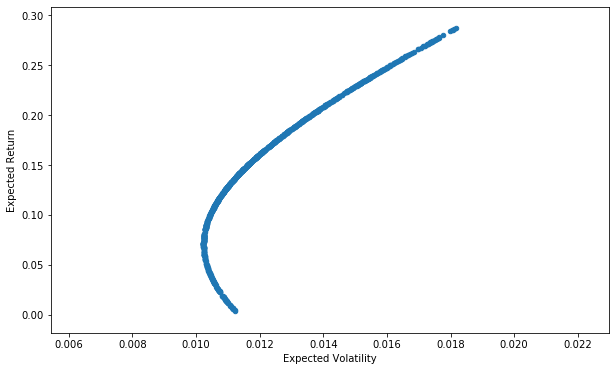

In [25]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')